In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
import librosa
import librosa.display

In [6]:
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('D:\\files\Datasets\Tess\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
1,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
2,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
3,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
4,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry


In [10]:
df['label'].value_counts()


angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

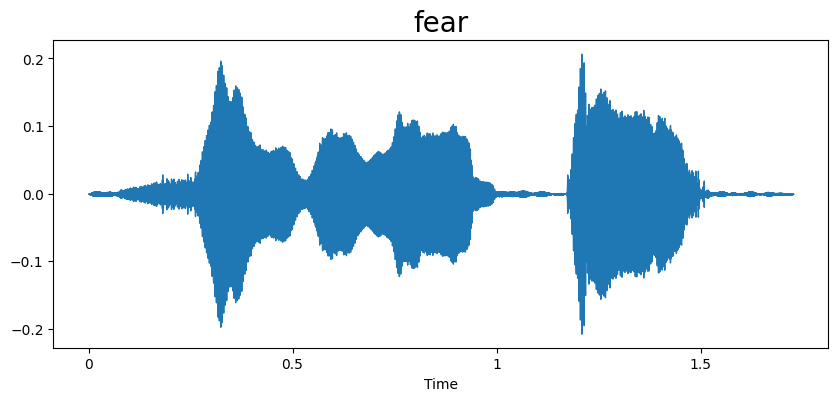

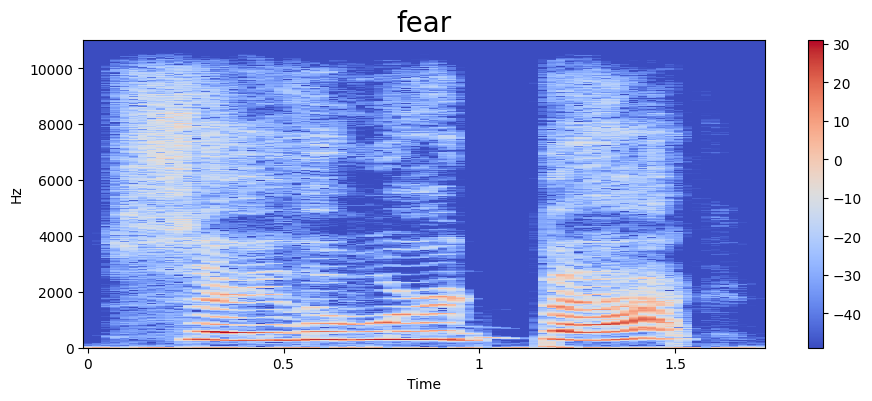

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [13]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [14]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622477e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100196e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294445e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034532e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [15]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.480273, -31.616299,...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873595, 18.061928, 6.0...
                              ...                        
2795    [-408.0878, 82.66084, 30.182562, 48.84698, -3....
2796    [-428.43256, 104.70308, 22.652096, 45.17939, 2...
2797    [-380.35938, 83.53616, 32.67897, 42.358284, -7...
2798    [-436.16336, 91.74894, 26.539776, 41.395664, -...
2799    [-423.6657, 73.28961, 29.890432, 48.220123, 2....
Name: speech, Length: 2800, dtype: object

In [16]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [17]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)
svd.fit(X)
X_transformed = svd.transform(X)

In [68]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [80]:
# Train an SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='auto',random_state=42)


In [82]:
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma='auto', random_state=42)

In [83]:
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9714285714285714


Epoch 1, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 2, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 3, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 4, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 5, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 6, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 7, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 8, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 9, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 10, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 11, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 12, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 13, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 14, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 15, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 16, Train Accuracy: 0.970, Validation Accuracy: 0.971
Epoch 17, Train Accuracy: 0.970, Validation Accur

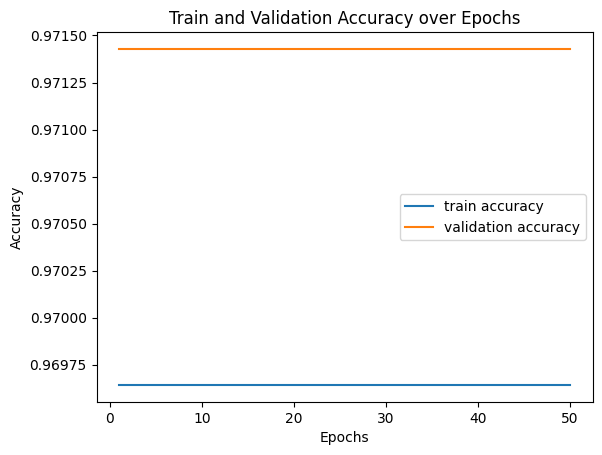

In [73]:
train_acc = []
val_acc = []

for epoch in range(50):
    # Train the model for one epoch
    svm_model.fit(X_train_scaled, np.argmax(y_train, axis=1))
    
    # Calculate the training accuracy for the current epoch
    y_train_pred = svm_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
    train_acc.append(train_accuracy)
    
    # Calculate the validation accuracy for the current epoch
    y_val_pred = svm_model.predict(X_test_scaled)
    val_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_val_pred)
    val_acc.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Accuracy: {train_accuracy:.3f}, Validation Accuracy: {val_accuracy:.3f}")

# Plot the train and validation accuracy over the epochs
import matplotlib.pyplot as plt

plt.plot(range(1, 51), train_acc, label='train accuracy')
plt.plot(range(1, 51), val_acc, label='validation accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()